Import thư viện

In [4]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [5]:
# đọc dữ liệu từ file csv
df = pd.read_csv(r'c:\Users\Admin\Downloads\Dữ-liệu-Lịch-sử-VNM-2013_2023 (2).csv')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

            Ngày  Đóng cửa    Mở cửa  Cao nhất Thấp nhất
0     21/07/2023  73,500.0  72,500.0  75,000.0  72,400.0
1     20/07/2023  72,700.0  72,600.0  72,900.0  72,300.0
2     19/07/2023  72,600.0  72,500.0  73,000.0  72,400.0
3     18/07/2023  72,400.0  72,500.0  72,600.0  72,200.0
4     17/07/2023  72,300.0  73,000.0  73,600.0  72,200.0
...          ...       ...       ...       ...       ...
2500  16/07/2013  96,528.0  95,139.0  97,222.0  95,139.0
2501  15/07/2013  95,139.0  95,139.0  95,833.0  94,444.0
2502  12/07/2013  95,139.0  94,444.0  95,139.0  93,750.0
2503  11/07/2013  94,444.0  94,444.0  95,139.0  93,750.0
2504  10/07/2013  94,444.0  95,139.0  95,833.0  94,444.0

[2505 rows x 5 columns]


In [6]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [7]:
#kích thước dữ liệu
df.shape

(2505, 5)

In [8]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,2023-07-21,"73,500.0","72,500.0","75,000.0","72,400.0"
1,2023-07-20,"72,700.0","72,600.0","72,900.0","72,300.0"
2,2023-07-19,"72,600.0","72,500.0","73,000.0","72,400.0"
3,2023-07-18,"72,400.0","72,500.0","72,600.0","72,200.0"
4,2023-07-17,"72,300.0","73,000.0","73,600.0","72,200.0"


In [9]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ngày       2505 non-null   datetime64[ns]
 1   Đóng cửa   2505 non-null   object        
 2   Mở cửa     2505 non-null   object        
 3   Cao nhất   2505 non-null   object        
 4   Thấp nhất  2505 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 98.0+ KB


In [10]:
#mô tả bộ dữ liệu
df.describe()

,Ngày
count,2505
mean,2018-07-17 16:17:14.730539008
min,2013-07-10 00:00:00
25%,2016-01-13 00:00:00
50%,2018-07-19 00:00:00
75%,2021-01-14 00:00:00
max,2023-07-21 00:00:00


In [11]:
# Kiểm tra dữ liệu thiếu
print(df.isnull().sum())

Ngày         0
Đóng cửa     0
Mở cửa       0
Cao nhất     0
Thấp nhất    0
dtype: int64


Tiền XỬ Lý DỮ LIỆU

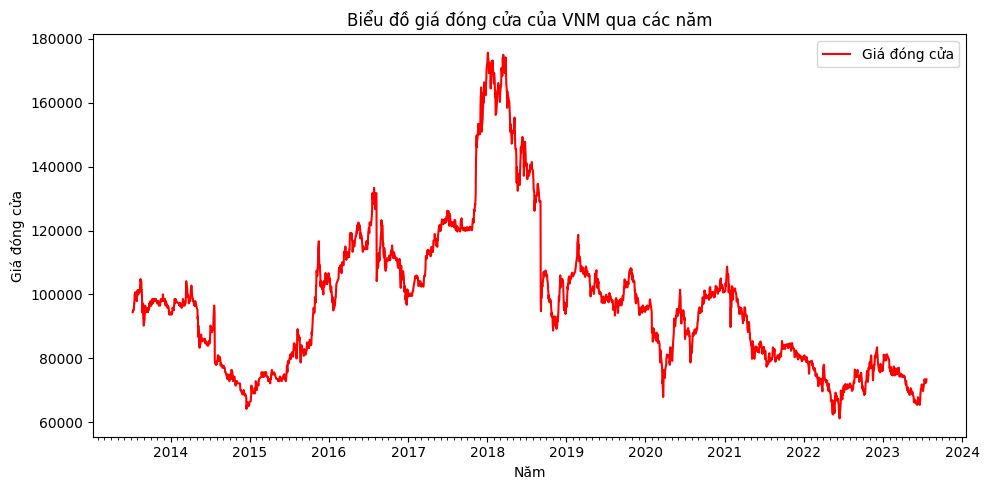

In [12]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()


<Axes: xlabel='Đóng cửa'>

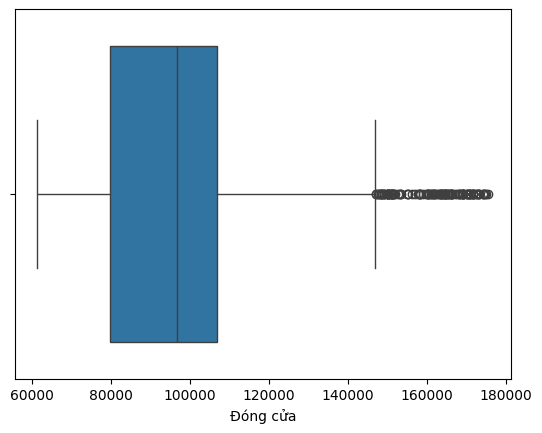

In [13]:
import seaborn as sns
sns.boxplot(x=df['Đóng cửa'])

Xử lý ngoại lai

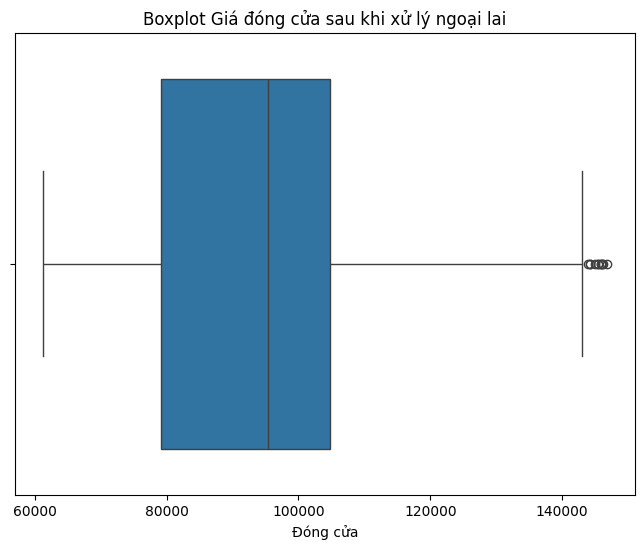

Số lượng dữ liệu ban đầu: 2505
Số lượng dữ liệu sau khi xử lý ngoại lai: 2382


In [14]:
# Sử dụng IQR để xác định và loại bỏ giá trị ngoại lai
Q1 = df['Đóng cửa'].quantile(0.25)
Q3 = df['Đóng cửa'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Đóng cửa'] >= lower_bound) & (df['Đóng cửa'] <= upper_bound)]

# Vẽ lại biểu đồ boxplot sau khi xử lý giá trị ngoại lai
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Đóng cửa'])
plt.title('Boxplot Giá đóng cửa sau khi xử lý ngoại lai')
plt.show()

# In ra số lượng dữ liệu trước và sau khi xử lý ngoại lai
print(f"Số lượng dữ liệu ban đầu: {len(df)}")
print(f"Số lượng dữ liệu sau khi xử lý ngoại lai: {len(df_no_outliers)}")

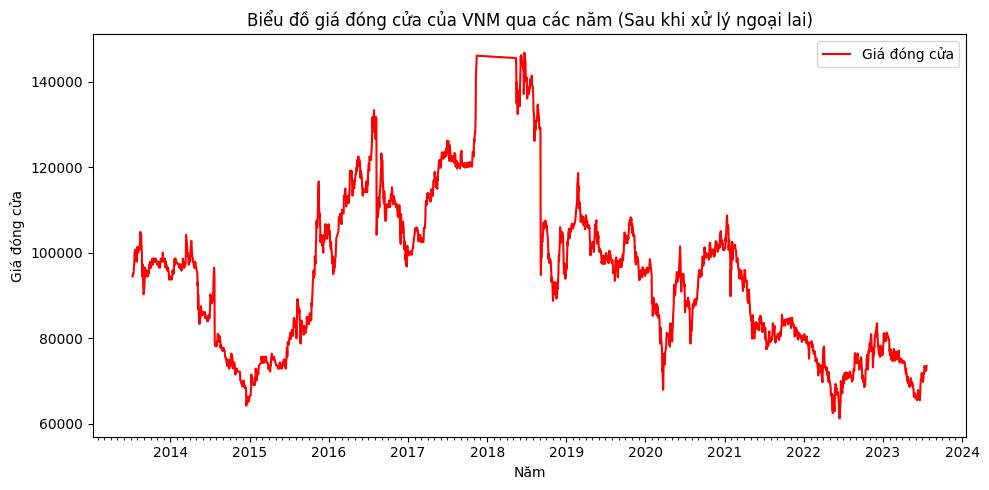

In [15]:
# biểu đồ giá đóng cửa qua các năm sau khi đã xử lý các giá trị ngoại lai

# Tạo đồ thị giá đóng cửa qua các năm sau khi xử lý ngoại lai
plt.figure(figsize=(10, 5))
plt.plot(df_no_outliers['Ngày'], df_no_outliers['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm (Sau khi xử lý ngoại lai)')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [16]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Đóng cửa
Ngày,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0
...,...
2023-07-17,72300.0
2023-07-18,72400.0
2023-07-19,72600.0


In [17]:
# Tạo các đường trung bình để nắm bắt xu hướng
df1['MA_5'] = df1['Đóng cửa'].rolling(window=5).mean()
df1['MA_10'] = df1['Đóng cửa'].rolling(window=10).mean()
df1['MA_20'] = df1['Đóng cửa'].rolling(window=20).mean()
df1['MA_60'] = df1['Đóng cửa'].rolling(window=60).mean()
df1['MA_120'] = df1['Đóng cửa'].rolling(window=120).mean()

In [18]:
# Tạo một cột tính phần trăm thay đổi giá cổ phiếu giữa các ngày
df1['Price_Change'] = df1['Đóng cửa'].pct_change()

In [19]:
# Dùng kĩ thuật RSI để cải thiện độ chính xác
def RSI(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df1['RSI'] = RSI(df1['Đóng cửa'], period=14)

In [20]:
df1

,Đóng cửa,MA_5,MA_10,MA_20,MA_60,MA_120,Price_Change,RSI
Ngày,,,,,,,,
2013-07-10,94444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-11,94444.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-07-12,95139.0,NaN,NaN,NaN,NaN,NaN,0.007359,100.000000
2013-07-15,95139.0,NaN,NaN,NaN,NaN,NaN,0.000000,100.000000
2013-07-16,96528.0,95138.8,NaN,NaN,NaN,NaN,0.014600,100.000000
...,...,...,...,...,...,...,...,...
2023-07-17,72300.0,73000.0,71890.0,70600.0,68973.333333,72271.666667,-0.013643,60.227273
2023-07-18,72400.0,72920.0,72070.0,70945.0,68981.666667,72197.500000,0.001383,60.227273
2023-07-19,72600.0,72740.0,72350.0,71260.0,69010.000000,72135.833333,0.002762,54.545455


In [21]:
# Xử lý các dữ liệu bị thiếu (vì khi sau khi tạo các đặc trưng mới, có thể xuất hiện dữ liệu bị thiếu (NaN))
df1.fillna(method='bfill', inplace=True)  # Điền giá trị bằng cách lấy giá trị phía sau
df1.fillna(method='ffill', inplace=True)  # Điền giá trị bằng cách lấy giá trị phía trước

C:\Users\Admin\AppData\Local\Temp\ipykernel_18380\3310697010.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='bfill', inplace=True)  # Điền giá trị bằng cách lấy giá trị phía sau
C:\Users\Admin\AppData\Local\Temp\ipykernel_18380\3310697010.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='ffill', inplace=True)  # Điền giá trị bằng cách lấy giá trị phía trước


In [22]:
# Chia tập dữ liệu (80% huấn luyện, 20% kiểm thử)
train_size = int(len(df1) * 0.8)
train_data, test_data = df1[:train_size], df1[train_size:]

In [23]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [24]:
# Tạo tập huấn luyện theo cửa sổ thời gian (Sliding Window)
def create_dataset(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 5  # Số ngày sử dụng để dự đoán
X_train, y_train = create_dataset(train_scaled[:, 0], window_size)
X_test, y_test = create_dataset(test_scaled[:, 0], window_size)

In [25]:

# Check scikit-learn version
import sklearn
print(sklearn.__version__)

1.5.2


In [26]:

# Check scikit-learn version
import sklearn
print(sklearn.__version__)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Sử dụng Bagging
bagging_model = BaggingRegressor(estimator=model, n_estimators=10, random_state=42) # Changed base_estimator to estimator

# Huấn luyện mô hình
bagging_model.fit(X_train, y_train)
# Dự đoán
y_pred = bagging_model.predict(X_test)

joblib.dump(bagging_model, 'linear_model.joblib')

1.5.2


['linear_model.joblib']

In [27]:
# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.006854057397045263
Mean Squared Error: 8.66529752010122e-05
R-squared: 0.9626262580321775


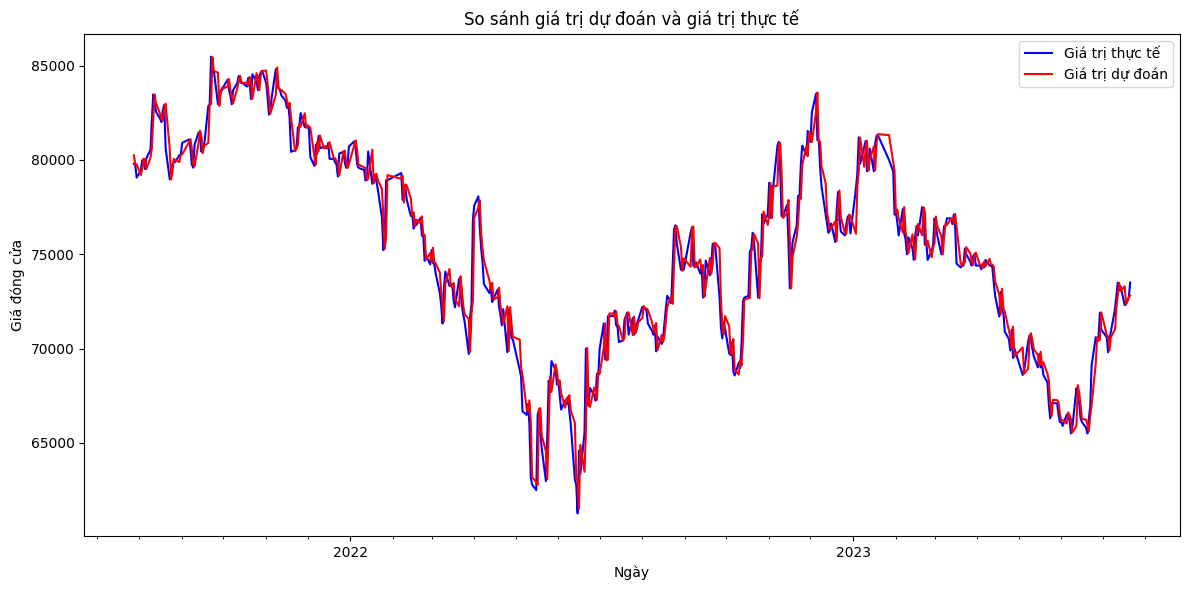

In [28]:
# Đảo ngược chuẩn hóa để lấy giá trị thực tế
y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test),7))), axis=1))[:,0]
y_pred_original = scaler.inverse_transform(np.concatenate((y_pred.reshape(-1, 1), np.zeros((len(y_pred),7))), axis=1))[:,0]


# Tạo biểu đồ so sánh giá trị dự đoán và giá trị thực tế
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[window_size:], y_test_original, label='Giá trị thực tế', color='blue')
plt.plot(test_data.index[window_size:], y_pred_original, label='Giá trị dự đoán', color='red')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.title('So sánh giá trị dự đoán và giá trị thực tế')
plt.legend()

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

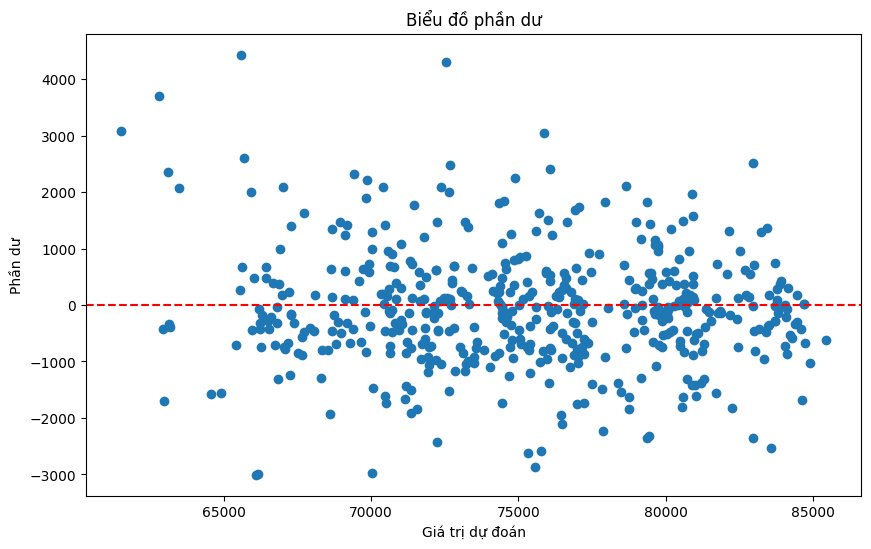

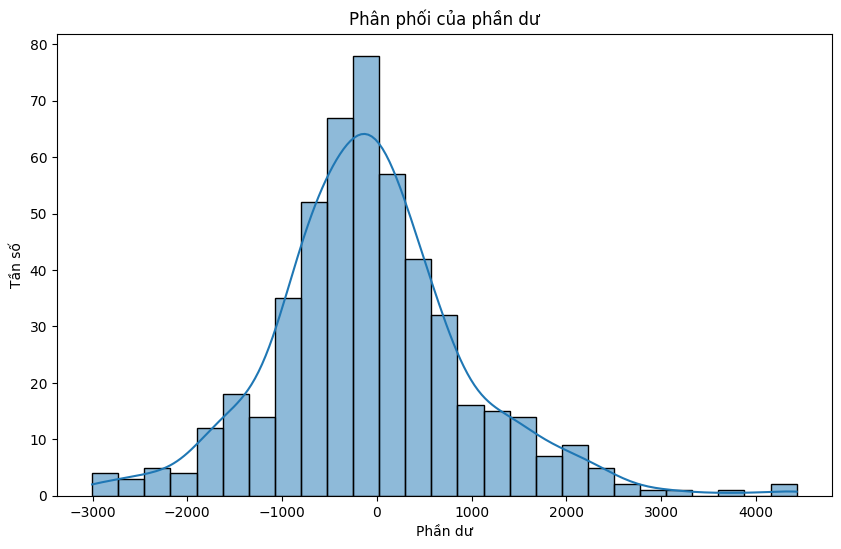

In [29]:
# Tính phần dư (residuals)
residuals = y_test_original - y_pred_original

# Tạo biểu đồ phân tán của phần dư
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Vẽ đường ngang tại y=0
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Phần dư')
plt.title('Biểu đồ phần dư')
plt.show()

# Tạo biểu đồ phân phối của phần dư
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Phần dư')
plt.ylabel('Tần số')
plt.title('Phân phối của phần dư')
plt.show()

In [30]:
# Tạo mô hình Ridge
ridge_model = Ridge(alpha=1.0)  # alpha là tham số điều chỉnh độ mạnh của regularisation

#sử dụng Bagging
ridge_bagging_model = BaggingRegressor(estimator=ridge_model, n_estimators=10, random_state=42) # Changed 'base_estimator' to 'estimator'

# Huấn luyện mô hình
ridge_bagging_model.fit(X_train, y_train)

# Dự đoán
y_pred_bagging = ridge_bagging_model.predict(X_test)

# Đánh giá mô hình
mae_ridge_bag = mean_absolute_error(y_test, y_pred_bagging)
mse_ridge_bag = mean_squared_error(y_test, y_pred_bagging)
r2_ridge_bag = r2_score(y_test, y_pred_bagging)

print(f"Mean Absolute Error (Ridge_Bag): {mae_ridge_bag}")
print(f"Mean Squared Error (Ridge_Bag): {mse_ridge_bag}")
print(f"R-squared (Ridge_Bag): {r2_ridge_bag}")

joblib.dump(ridge_bagging_model, 'ridge_model.joblib')

Mean Absolute Error (Ridge_Bag): 0.008015923889107837
Mean Squared Error (Ridge_Bag): 0.00011132278157879492
R-squared (Ridge_Bag): 0.9519860812140061


['ridge_model.joblib']

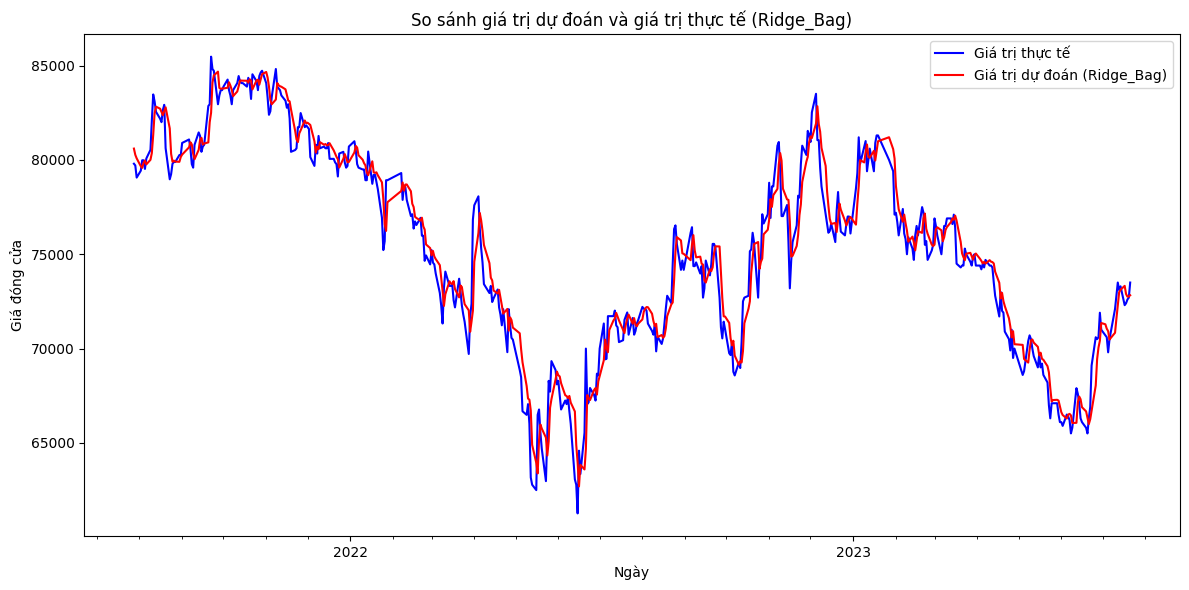

In [31]:
# Đảo ngược chuẩn hóa để lấy giá trị thực tế
y_test_original_ridge_bag = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test),7))), axis=1))[:,0]
y_pred_original_ridge_bag = scaler.inverse_transform(np.concatenate((y_pred_bagging.reshape(-1, 1), np.zeros((len(y_pred_bagging),7))), axis=1))[:,0]


# Tạo biểu đồ so sánh giá trị dự đoán và giá trị thực tế
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[window_size:], y_test_original_ridge_bag, label='Giá trị thực tế', color='blue')
plt.plot(test_data.index[window_size:], y_pred_original_ridge_bag, label='Giá trị dự đoán (Ridge_Bag)', color='red')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.title('So sánh giá trị dự đoán và giá trị thực tế (Ridge_Bag)')
plt.legend()

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

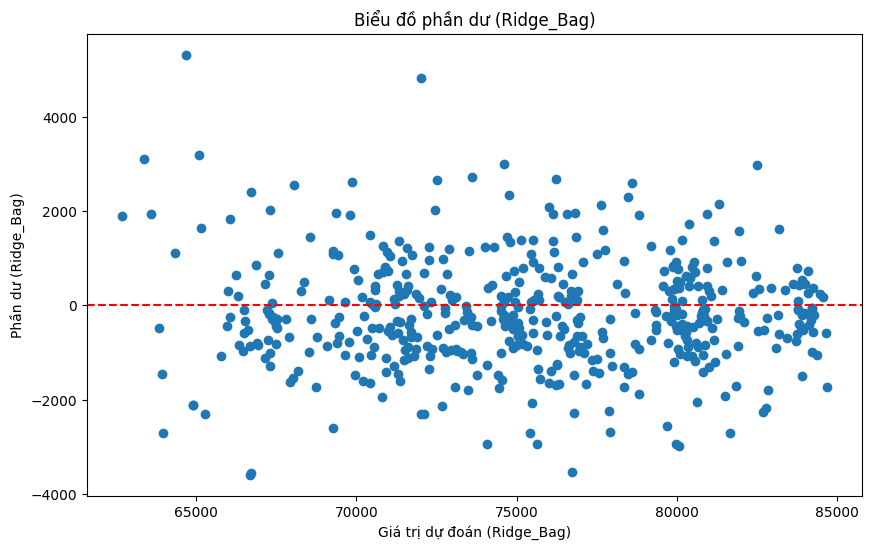

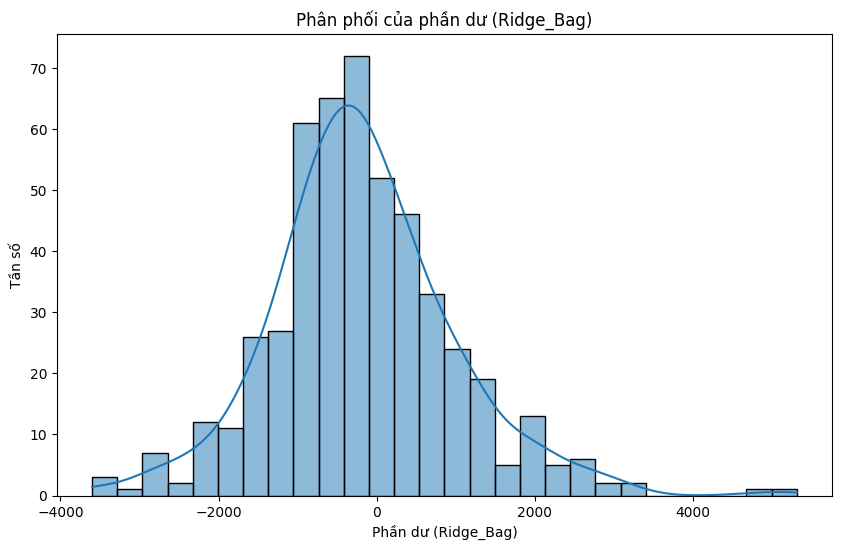

In [32]:
# Tính phần dư (residuals)
residuals_bagging = y_test_original_ridge_bag - y_pred_original_ridge_bag # Corrected variable names from 'rigde' to 'ridge'

# Tạo biểu đồ phân tán của phần dư
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original_ridge_bag, residuals_bagging) # Corrected variable name from 'rigde' to 'ridge'
plt.axhline(y=0, color='red', linestyle='--')  # Vẽ đường ngang tại y=0
plt.xlabel('Giá trị dự đoán (Ridge_Bag)')
plt.ylabel('Phần dư (Ridge_Bag)')
plt.title('Biểu đồ phần dư (Ridge_Bag)')
plt.show()

# Tạo biểu đồ phân phối của phần dư
plt.figure(figsize=(10, 6))
sns.histplot(residuals_bagging, kde=True)
plt.xlabel('Phần dư (Ridge_Bag)')
plt.ylabel('Tần số')
plt.title('Phân phối của phần dư (Ridge_Bag)')
plt.show()

In [33]:
# Tạo mô hình Neural Network
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

#sử dụng Bagging
mlp_bagging_model = BaggingRegressor(estimator=mlp_model, n_estimators=10, random_state=42) # Changed 'base_estimator' to 'estimator'

# Huấn luyện mô hình
mlp_bagging_model.fit(X_train, y_train)

# Dự đoán
y_pred_bagging = mlp_bagging_model.predict(X_test)

# Đánh giá mô hình
mae_mlp_bag = mean_absolute_error(y_test, y_pred_bagging)
mse_mlp_bag = mean_squared_error(y_test, y_pred_bagging)
r2_mlp_bag = r2_score(y_test, y_pred_bagging)

print(f"Mean Absolute Error (Neural Network_Bag): {mae_mlp_bag}")
print(f"Mean Squared Error (Neural Network_Bag): {mse_mlp_bag}")
print(f"R-squared (Neural Network_Bag): {r2_mlp_bag}")

joblib.dump(mlp_bagging_model, 'neural_net_model.joblib')

Mean Absolute Error (Neural Network_Bag): 0.009608465448792755
Mean Squared Error (Neural Network_Bag): 0.00015932845829307534
R-squared (Neural Network_Bag): 0.9312810590223471


['neural_net_model.joblib']

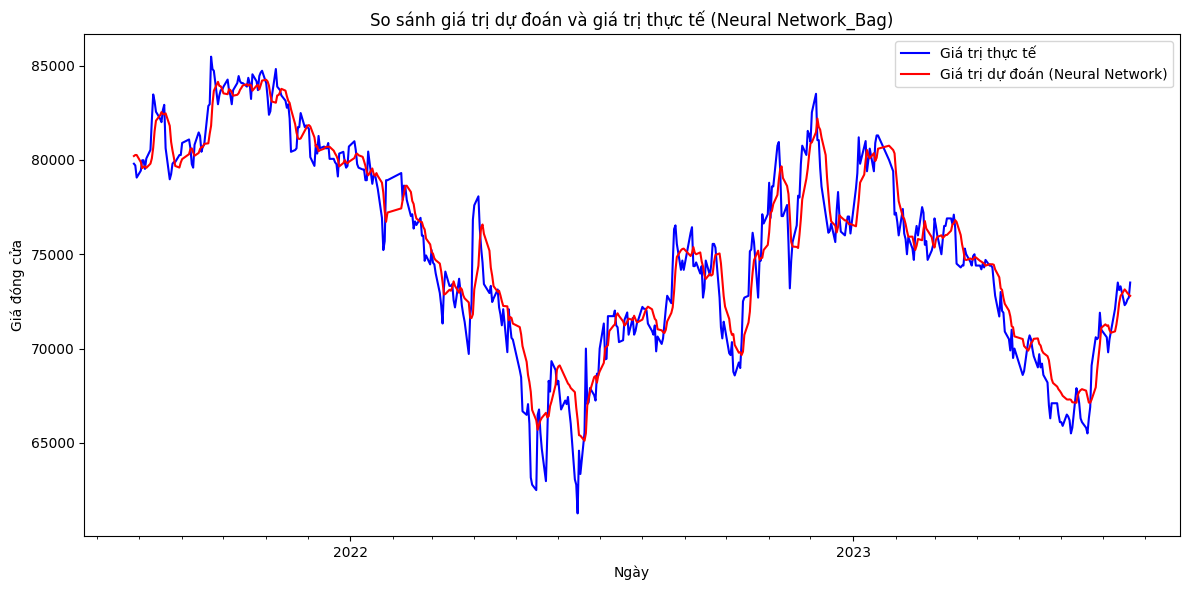

In [34]:
# Đảo ngược chuẩn hóa để lấy giá trị thực tế
y_test_original_mlp_bag = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test),7))), axis=1))[:,0]
y_pred_original_mlp_bag = scaler.inverse_transform(np.concatenate((y_pred_bagging.reshape(-1, 1), np.zeros((len(y_pred_bagging),7))), axis=1))[:,0]


# Tạo biểu đồ so sánh giá trị dự đoán và giá trị thực tế
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[window_size:], y_test_original_mlp_bag, label='Giá trị thực tế', color='blue')
plt.plot(test_data.index[window_size:], y_pred_original_mlp_bag, label='Giá trị dự đoán (Neural Network)', color='red')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.title('So sánh giá trị dự đoán và giá trị thực tế (Neural Network_Bag)')
plt.legend()

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

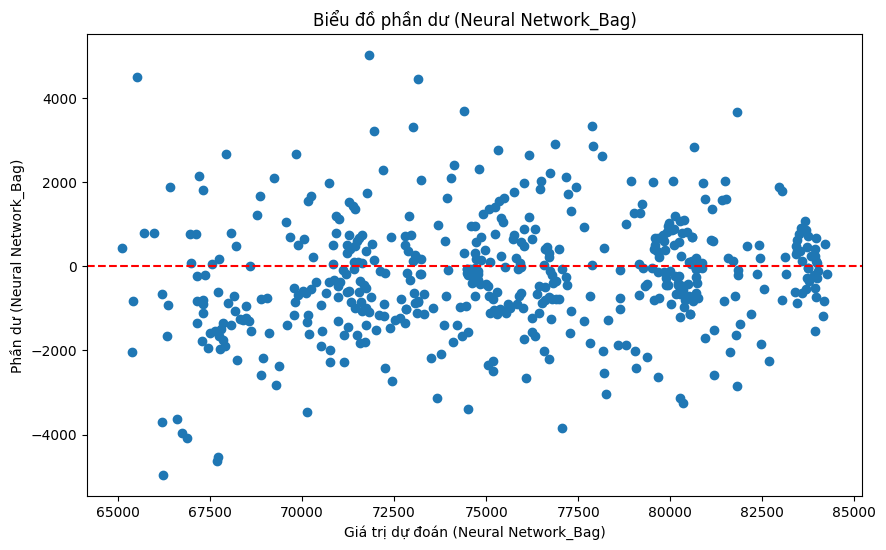

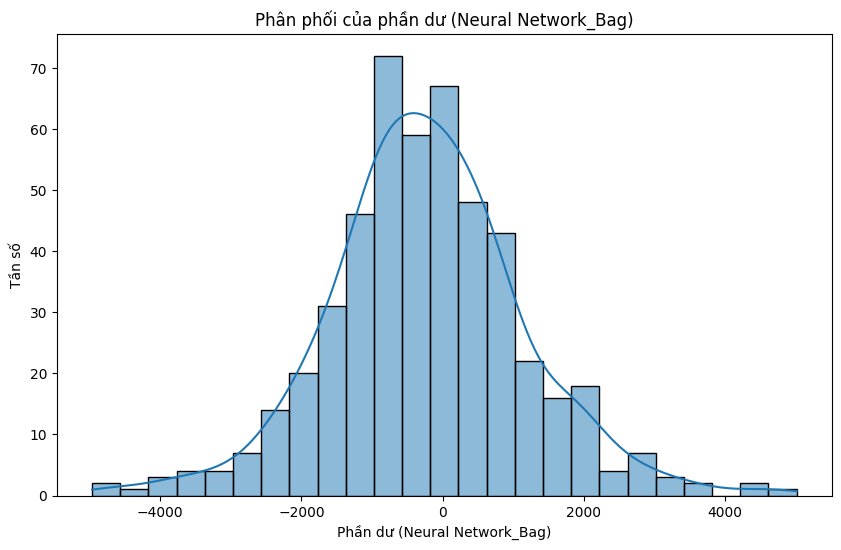

In [35]:
# Tính phần dư (residuals)
residuals_mlp = y_test_original_mlp_bag - y_pred_original_mlp_bag

# Tạo biểu đồ phân tán của phần dư
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original_mlp_bag, residuals_mlp) # Changed 'residuals_mlp_bag' to 'residuals_mlp'
plt.axhline(y=0, color='red', linestyle='--')  # Vẽ đường ngang tại y=0
plt.xlabel('Giá trị dự đoán (Neural Network_Bag)')
plt.ylabel('Phần dư (Neural Network_Bag)')
plt.title('Biểu đồ phần dư (Neural Network_Bag)')
plt.show()

# Tạo biểu đồ phân phối của phần dư
plt.figure(figsize=(10, 6))
sns.histplot(residuals_mlp, kde=True)
plt.xlabel('Phần dư (Neural Network_Bag)')
plt.ylabel('Tần số')
plt.title('Phân phối của phần dư (Neural Network_Bag)')
plt.show()

In [36]:
df.head()

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất,Năm
2504,2013-07-10,94444.0,95139.0,95833.0,94444.0,2013
2503,2013-07-11,94444.0,94444.0,95139.0,93750.0,2013
2502,2013-07-12,95139.0,94444.0,95139.0,93750.0,2013
2501,2013-07-15,95139.0,95139.0,95833.0,94444.0,2013
2500,2013-07-16,96528.0,95139.0,97222.0,95139.0,2013


In [37]:
df.columns

Index(['Ngày', 'Đóng cửa', 'Mở cửa', 'Cao nhất', 'Thấp nhất', 'Năm'], dtype='object')